# Teacher's Assignment No. 11

***Author:*** *Ofir Paz* $\qquad$ ***Version:*** *(21/10/2023)* $\qquad$ ***Course:*** *20942 - Intrduction to machine learning*

Welcome to the first assignment of the course *Intrduction to machine learning*. \
In this first assignemnt we will implement: 
- Perceptron learning algorithm (PLA)
- Softmax Regression
- Linear regression

We will then explore and discuss our results and compare them to deduce the positives and negatives for each of the algorithms. \
We will implement those algorithms to learn a hypothesis function $\hat{h}\in H$ to classify the digit that a given $28\times 28$ grayscaled image is representing, using the MNIST dataset.  

## Table of Contents
- [Packages](#1)
- [MNIST Dataset](#2)
    - [Fetching MNIST Dataset](#2-1)
    - [Data Partitioning](#2-2)
    - [Adding The Bias Term](#2-3)
    - [One-Hot Vector Representation](#2-4)
- [PART A: Perceptron Learning Algorithm](#3)
    - [PLA Implementation](#3-1)
        - [Pocket Algorithm Implementation](#3-1-1)
    - [Binary Classification](#3-2)
        - [Training Using Perceptron Learning Algorithm](#3-2-1)
        - [Predicting](#3-2-2)
    - [PLA Model Evaluation](#3-3)
        - [Binary Classifiers Performance](#3-3-1)
            - [Binary Table of Confusion](#3-3-1-1)
            - [In-Sample Error over Time](#3-3-1-2)
            - [Calculating True Positive Rate](#3-3-1-3)
        - [Multi-Class Confusion Matrix](#3-3-2)
        - [Evaluating The Model's Accuracy](#3-3-3)
    - [Conclusions For PLA](#3-4)
- [PART B: Softmax Regression](#4)
    - [Forward Propogation](#4-1)
    - [Backward Propogation](#4-2)
        - [Minimizing The Cost Function](#4-2-1)
        - [Gradient Decent](#4-2-2)
    - [Computing Cost And Updating Weights](#4-3)
    - [Training The Model](#4-4)
    - [Softmax Regression Model Evaluation](#4-5)
        - [Performance On Cost Function](#4-5-1)
        - [Evaluating The Model's Accuracy](#4-5-2)
        - [Binary Classifiers Performance](#4-5-3)
            - [Binary Table of Confusion](#4-5-3-1)
            - [Calculating True Positive Rate](#4-5-3-2)
        - [Multi-Class Confusion Matrix](#4-5-4)
    - [Conclusions For Softmax Regression](#4-6)
- [PART C: Linear Regression](#5)
    - [Least Squares](#5-1)
        - [Developing Least Squares Formula](#5-1-1)
        - [Finding the Optimum](#5-1-2)
    - [Implementing Linear Regression](#5-2)
        - [Fitting with Linear Regression](#5-2-1)
        - [Predicting with Linear Regression Model](#5-2-2)
        - [Training the Linear Regression Model](#5-2-3)
    - [Linear Regression Model Evaluation](#5-3)
        - [Multi-Class Confusion Matrix](#5-3-1)
        - [Evaluating The Model's Accuracy](#5-3-2)
    - [Conclusions for Linear Regression](#5-4)

## Packages <a id='1'></a>

Let's import all the packages that we will be used during this assignemnt.

- [numpy](https://numpy.org) is the fundamental package for scientific computing with Python.
- [scikit-learn](https://scikit-learn.org) is a simple library that implements machine learning algorithms.
- [matplotlib](https://matplotlib.org) is a library to plot graphs in Python.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from util import sign, evalEin  # Basic utility functions
from sklearn.datasets import fetch_openml  # To fetch the hand-written digits dataset
from sklearn.model_selection import train_test_split  # To split the dataset
from tqdm.notebook import tqdm  # Progress bar

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## MNIST Dataset <a id='2'></a>

As described above, we will use the MNIST dataset for our experiment. \
The MNIST Dataset is a dataset of images of $28\times 28$ digits ranging for $0$ to $9$ inclusive. It consists of $60,000$ training images and $10,000$ testing images. \
To use this dataset, we will need to
- Fetch the dataset
- Partition it to train and test sets

### Fetching MNIST Dataset <a id='2-1'></a>

Let's fetch the dataset from MNIST

In [74]:
# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']

print("The shape of the data array is: " + str(X.shape))
print("The shape of the target array is: " + str(y.shape))

The shape of the data array is: (70000, 784)
The shape of the target array is: (70000,)


Let's plot some of the examples from the data set. The examples are plotting at random, so the reader is invited to run the cell below as many times as they wishes.

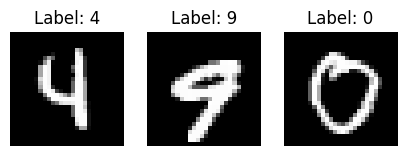

In [75]:
def plot_random_img(num_images=3):
    """
    Plots a specified number of randomly selected images from the dataset.

    Parameters:
    - num_images (int): Number of images to plot.

    Returns:
    None
    """

    # Get random indexes from the dataset
    indexes = np.random.choice(X.shape[0], size=num_images)

    # Create subplots
    fig, axarr = plt.subplots(1, num_images)

    # Iterate through selected indexes and plot images
    for index, plot in zip(indexes, range(num_images)):
        
        # Extract features (pixel values) for the selected image.
        image_features = X.iloc[index].values.reshape(28, 28)  # Reshape to a 28x28 image.

        # Plot the image
        axarr[plot].axis('off')
        axarr[plot].set_title(f"Label: {y[index]}")  # Display the corresponding label.
        axarr[plot].imshow(image_features)

plot_random_img(num_images=3)

### Data Partitioning <a id='2-2'></a>

In this sub-section, we will partition the data of 70,000 examples we fetched into a training set of 60,000 examples and a test set of 10,000 examples.

In [76]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=1/7)

# Take transpose so the feature vectors are coloumn vectors and normalize.
X_train_orig = X_train_orig.T/255; X_test_orig = X_test_orig.T/255
d = X_train_orig.shape[0]

# Set the y arrays to numpy arrays
y_train_orig = np.array(y_train_orig, dtype=int)
y_test_orig = np.array(y_test_orig, dtype=int)

# Printing the shapes of the split sets.
print("X_train.shape = " + str(X_train_orig.shape))
print("y_train.shape = " + str(y_train_orig.shape))
print("X_test.shape = " + str(X_test_orig.shape))
print("y_test.shape = " + str(y_test_orig.shape))

X_train.shape = (784, 60000)
y_train.shape = (60000,)
X_test.shape = (784, 10000)
y_test.shape = (10000,)


### Adding The Bias Term <a id='2-3'></a>

The input vectors are column vectors with order of 784. The PLA predicts an outcome based on the following equation:
$$ \mathbf{w}^T\mathbf{x}+b>0 $$
or
$$ \mathbf{w}^T\mathbf{x}>-b$$
where $b$ is the bias term. instead of having the algorithm learn the bias term differently from the weights, we would add it as a weight $w_0$ to learn in the weight vector $\mathbf{w}$ and add the value $1$ to the input vector $\mathbf{x}$. Thus we increase the dimentions of the vector from $d=784$ to $d+1=785$.

In [77]:
# Adding 1 to the start of the input vectors. Note that 'aug' stands for augmented
X_train_aug = np.concatenate((np.ones((1, X_train_orig.shape[1])), X_train_orig), axis=0)
X_test_aug = np.concatenate((np.ones((1, X_test_orig.shape[1])), X_test_orig), axis=0)

# Printing the shapes of the augmented sets.
print("X_train_aug.shape = " + str(X_train_aug.shape))
print("X_test_aug.shape = " + str(X_test_aug.shape))

X_train_aug.shape = (785, 60000)
X_test_aug.shape = (785, 10000)


### One-Hot Vector Representation <a id='2-4'></a>

The label of each input is a number $0-9$ corresponding to the digit displayed in the image. This could be troublesome for our learning algorithms, so we will implement the *One-Hot Vector Representation* that will transform a label $y$ to an array in which for every index $i$, if $i=y$ the value is $1$ otherwise it will be $0$. \
 For example, given $y=1$ the matching One-Hot Vector will be $[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]$ and for $y=9$ it will be $[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$ \
\
**Note** that the size of every array is the number of classes (10). 

In [78]:
identity_matrix = np.eye(10) # Create the identity matrix of size 10x10

# Get the one hot vectors. we use the labels as indexes.
y_train_one_hot = identity_matrix[y_train_orig].T
y_test_one_hot = identity_matrix[y_test_orig].T

# Printing the shapes of the One-Hot Vectors for validation of the process.
print("y_train_one_hot.shape = " + str(y_train_one_hot.shape))
print("y_test_one_hot.shape = " + str(y_test_one_hot.shape))

y_train_one_hot.shape = (10, 60000)
y_test_one_hot.shape = (10, 10000)


## PART A: Perceptron Learning Algorithm <a id='3'></a>

The *Perceptron Learning Algorithm* (PLA) is an algorithm which finds an optimal hypthesis function for a linearly separable dataset by iteratively fitting an initialized hypothesis function to the given examples in the dataset. \
We want to use the PLA to get a hypothesis function $h$ to predict the number that the input image is representing, but there are a few problems:

- The data may not be linearly separable.
- We need to clasify between 10 classes while the PLA is a binary classifier.

To solve these problems, we will implement:

- Pocket Algorithm
- Binary classification

We will start with the implementation of the algorithms.

### PLA Implementation <a id='3-1'></a>

Let's now implement the PLA for a single iteration (We will address the non-linear separability case later).
In this implementation, we strive to use vectorization as much as possible so it is not the same as the standard pseudo-code presentation of the algorithm. \
In here, we calculate the prediction of $w$ on the training set using dot product multiplication, find the first example that its prediction is different from the label, and update the weight vector according to it (if there was a missclasification). 

In [79]:
def PLA(w, X_set, y_set):
    """
    Perceptron Learning Algorithm (for one iteration).
    This algorithm updates the given weight vector to fit more to the given set.

    Parameters:
    w       --  The weight vector to update (coloumn vector).
    X_set   --  The input vectors of the set to fit w to (stacked coloumns).
    y_set   --  The labels corresponding to the input vectors of the set.

    Returns:
    w_next  --  The updated weight vector that is more fitted to the given set.
                (not guaranteed to be fitted more in the case of non-linear separable data set) 
    """
    
    # Calculate predictions of input set X based on weight vector w
    y_predict_of_w = sign(np.dot(w.T, X_set), np)

    # Use vectorized implementation to search for a misclassified label
    misclassified_label_index = np.argmax(y_predict_of_w != y_set)

    # Extract the number of training examples
    num_examples = X_set.shape[1]

    # Update the weight vector w if there was a misclassified label
    w_next = w
    if misclassified_label_index != num_examples:
        # w_next = w + x(wrong_index)*y(wrong_index)
        w_next = np.add(w, np.multiply(X_set[:, misclassified_label_index],
                                        [y_set[misclassified_label_index]]).reshape((w.shape)))

    return w_next

#### Pocket Algorithm Implementation <a id='3-1-1'></a>

In this sub-section we will address the issue where the data is not linearly separable. \
To fix the issue, we introduce the *Pocket algorithm*, an algorithm that extends the PLA to handle non-linearly separable data. In short, the algorithm iterates the PLA on the training set for $T$ iterations, and returns the best weight vector $\hat{\mathbf{w}}$ in terms of $E_{in}$, which is the *In sample error*.

In [80]:
def pocket(X_set, y_set, T=100):
    """
    Pocket Algorithm.
    This algorithm find a hypothesis function that is fitted to the given dataset.
    If the dataset is linearly separable and T is big enough, the returned hypothesis
    will have 0 In-sample error, otherwise will get find a hypothesis with optimal In-sample error.

    Parameters:
    X_set   --  The input vectors of the set (stacked coloumns).
    y_set   --  The labels corresponding to the input vectors of the set.
    T       --  The number of iterations for the algorithm to perform.

    Returns:
    w_optimal       --  The hypothesis function that is fitted to the dataset (weight vector).
    E_in_min_vals   --  An array holding the value of E_in_min after each iteration 
                        (use for plotting results).
    """

    # Extract the number of features in the input vector.
    num_features = X_set.shape[0]

    # Initializing.
    w_optimal = np.zeros((num_features, 1), dtype=float)
    w_curr = np.zeros((num_features, 1), dtype=float)
    E_in_min = 1
    E_in_min_vals = np.zeros(T, dtype=float)

    # Loop of the pocket algorithm.
    for t in range(T):
        w_curr = PLA(w_curr, X_set, y_set) # Run PLA for a single iteration.
        E_in_curr = evalEin(w_curr, X_set, y_set, np) # Evaluate E_in
        
        # Update w_optimal and E_in_min if PLA found a better weight vector in terms of E_in
        if E_in_curr < E_in_min:
            w_optimal = w_curr
            E_in_min = E_in_curr

        E_in_min_vals[t] = E_in_min # Save the current value of E_in_min

    return w_optimal, E_in_min_vals

### Binary Classification <a id='3-2'></a>

As said before, the PLA is a *binary classifier*. In order to use the PLA for non-binary classifing, we can use the *one-vs-all* strategy. In this strategy, we use the PLA to find $k=10$ ($k$ stands for the number of classes to classify from) hypothesis functions, each one binary classifies if a given input is some class or not. \
Let's use our implementation of the pocket algorithm and PLA to find the $k=10$ hypothesis functions.

**Note** that each class represents a different digit $0-9$.

In [81]:
def pla_model(X_train_aug, y_train_one_hot, T=100):
    """
    Model that uses pocket algorithm and binary classifiers for multi-class classifying.
    This algorithm finds binary classifiers as well as their error histograms.

    Parameters:
    X_train_aug         --  The input vectors of the set (stacked coloumns).
                             Assumes for each feature vector x, x[0] = 1 (bias term)
    y_train_one_hot     --  The labels corresponding to the input vectors of the set.
                             Assumes One-Hot Vector Representation.
    T                   --  The number of iterations for the algorithm to perform for each classifier.

    Returns:
    binary_classifiers  --  An array containing The hypothesis functions that are fitted to
                             the dataset (weight vector), each function classifies a different class.
    E_in_min_values     --  An array holding the values of E_in_min for every classifier after each
                             iteration of the pocket algorithm (use for plotting results).
    """

    num_features = X_train_aug.shape[0] # Extract number of features in a feature vector
    num_classes = y_train_one_hot.shape[0] # Extract number of classes (k)

    # Initialize
    binary_classifiers = np.empty((num_features, num_classes)) # Will hold the different binary classifiers.
    E_in_min_values = np.empty(num_classes, dtype=object) # Histograms of E_in_min for each classifier. 
    
    for i in tqdm(range(num_classes)):
        # Extract the coloumn of y_train_one_hot corresponding to the current class
        y_train_binary_class = np.where(y_train_one_hot[i,:] == 1, +1, -1)

        # Find the binary classifier and its histogram and save them
        binary_classifiers[:, i:i+1], E_in_min_values[i] = pocket(X_train_aug, y_train_binary_class, T)
        
    return binary_classifiers, E_in_min_values

#### Learning Using Perceptron Learning Algorithm <a id='3-2-1'></a>

We finished implementing all the needed algorithms for learning. \
All we need now is to learn our desired hypothesis functions.

In [82]:
T = 250  # Define number of iterations for the algorithm

binary_classifiers, E_in_min_values = pla_model(X_train_aug, y_train_one_hot, T)

  0%|          | 0/10 [00:00<?, ?it/s]

Congratulations! we have finished learning. But what have we learnt? \
We found 10 binary classifiers that can give a score to determine if an image is some digit or no.
But how can we use that to determine which digit is in a given image? we will address this issue in the next sub-section.

#### Predicting <a id='3-2-2'></a>

As mentioned in the previous sub-section, we need a way to determine which digit is a given image using our learnt binary classifiers. We can do that by letting each binary classifier assign a score to an image, and we will mark the image with the digit corresponding to the biggest score. for each digit $0<=i<=9$, its score will be 
$$\hat{\mathbf{w}}^y\mathbf{x}$$
wheres $\hat{\mathbf{w}}^y$ is the optimal weight for the binary classifer of the digit $y$, and $\mathbf{x}$ is some feature vector. \
\
**Note** That we can simplify this process by taking the *binary_classifiers*$^T$ matrix, matrix-multiply it with some feature vector $\mathbf{x}$ and take the index of the maximum element of the resulted coloumn vector since the *binary_classifiers* matrix is just the stacked optimal weight coloumn vectors.  

In [83]:
def predict(W, x):
    """
    Predicts the class of the given input vector based on the given weights matrix.

    Parameters:
    W   --  Matrix of binary classifiers stacked as coloumn vectors.
    x   --  Input coloumn vector.

    Returns:
    prediction  --  The prediction of x (also referred as 'y hat') based on W.
    """

    # Calculate the scores of each digit
    scores = np.dot(W.T, x)

    # Take the index of the maximum score as the predicted class. 
    prediction = np.argmax(scores, axis=0)

    return prediction

We can now use our model to predict which digit is in a given $28\times 28$ gray scaled image. \
Run the cell below as many times as you wish to view predictions of our model.

**Note** that not every image will be classified correctly, as we will see in the next sub-section that the model's *Accuracy* (ACC) is not $100\%$.

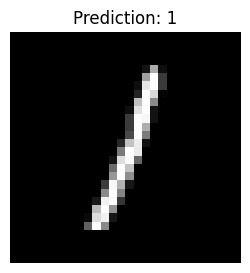

In [84]:
def show_rand_prediction(W, inputs):
    """
    Show a random prediction based on the given hypothesis.

    Parameters:
    W (numpy.ndarray): The weight vector for the hypothesis.
    inputs (numpy.ndarray): Input data for predictions.

    Returns:
    None
    """

    # Get the number of inputs
    num_inputs = inputs.shape[1]

    # Get a random input to predict
    x = inputs[ : , np.random.choice(num_inputs)]

    # Make a prediction on the input based on the given hypothesis
    prediction = predict(W, x)

    # Extract features (pixel values) for the selected image.
    image_features = x[1:].reshape(28, 28)  # Reshape to a 28x28 image (and ignore x0, the constant 1 value).

    # Plot the image
    plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.title(f"Prediction: {prediction}")  # Display the prediction.
    plt.imshow(image_features)

show_rand_prediction(binary_classifiers, X_test_aug)

### PLA Model Evaluation <a id='3-3'></a>

After defining how we predict different classes, let's evaluate our model.
We can do that by evaluating:

- Binary classifiers performance using
    - Table of confusion for each digit
    - Displaying binary in sample loss ($E_{in}$) over time
    - Calculating the *true positive rate* (TPR) for each classifer
- Multi-Class confusion matrix
- Model's accuracy

Let's start with the Multi-Class confusion matrix.

#### Binary Classifiers Performance <a id='3-3-1'></a>

In this sub-section, we will evaluate each binary classifer's performance on the MNIST dataset. \
As said before, evaluation will be done using two methods:
- Calculating table of confusion for each digit.
- Displaying the $ E_{in} $ over iterations.
- Calculating the *true positive rate* (TPR) for each classifer

##### Binary Table of Confusion <a id='3-3-1-1'></a>

The table of confusion, also known as a confusion matrix, is a useful tool for evaluating the performance of a classification model. It provides a detailed breakdown of the model's predictions and the actual labels for each class.

In the context of digit classification, the table of confusion can be used to analyze the performance of binary classifiers for each digit. Each digit is treated as a separate class, and the binary classifier is trained to distinguish between that digit and all other digits.

The table of confusion for each digit consists of four values:

- True Positives (TP): The number of instances where the model correctly predicted the digit as the positive class (the digit itself).
- False Positives (FP): The number of instances where the model incorrectly predicted the digit as the positive class when it was actually a different digit.
- False Negatives (FN): The number of instances where the model incorrectly predicted a different digit as the positive class when it was actually the digit of interest.
- True Negatives (TN): The number of instances where the model correctly predicted a different digit as the negative class (not the digit of interest).

By analyzing the values in the table of confusion, we can gain insights into the performance of the binary classifier for each digit. For example, a high number of false positives or false negatives may indicate that the classifier is struggling to distinguish between the digit of interest and other digits.

The table of confusion can be visualized as a matrix, where the rows represent the true labels and the columns represent the predicted labels. Each cell in the matrix represents the count of instances falling into that category.

Analyzing the table of confusion for each digit can help identify patterns and areas for improvement in the classification model. It allows us to understand the specific challenges faced by the model when classifying different digits and can guide us in refining the model to improve its accuracy and performance.

In the following code snippet we will write the functions to compute the confusion matrix and display it.

In [85]:
def compute_confusion_matrix(true_labels, predicted_labels, num_classes):
    """
    Compute the confusion matrix.

    Parameters:
    true_labels (array-like): True labels of the samples.
    predicted_labels (array-like): Predicted labels of the samples.
    num_classes (int): Number of classes in the classification problem.

    Returns:
    numpy.ndarray: Confusion matrix (cm), where rows represent true labels and columns represent predicted labels.
    """

    cm, _, _ = np.histogram2d(true_labels, predicted_labels, num_classes)

    return cm

def plot_confusion_matrix(conf_matrices):
    """
    Plot multiple confusion matrices in a grid.

    Parameters:
    conf_matrices (list): List of tuples containing confusion matrices and their titles.
                         Each tuple should be in the form (conf_matrix, title).

    Returns:
    None
    """
    
    # Extract number of confusion matrices to plot
    num_conf = len(conf_matrices)
    
    # Compute number of subplots needed for the matrices
    _, axarr = plt.subplots(np.ceil(num_conf/2).astype(int), min(2, num_conf), figsize=(10, 40))
    
    # Flatten the 2D array of subplots
    axarr = np.ravel(axarr)

    for i, item in enumerate(conf_matrices):
        # Extract the matrix and its title
        conf_matrix, title = item

        # Plot the confusion matrix
        im = axarr[i].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        axarr[i].set_title(title)
        cbar = axarr[i].figure.colorbar(im, ax=axarr[i], fraction=0.046, pad=0.04)
        cbar.set_label('Count')

        # Extracting the number of classes
        num_classes = conf_matrix.shape[0]
        tick_marks = np.arange(num_classes)

        axarr[i].set_xticks(tick_marks, range(num_classes))
        axarr[i].set_yticks(tick_marks, range(num_classes))

        axarr[i].set_xlabel('Predicted label')
        axarr[i].set_ylabel('True label')

        # Add the numbers to the plot
        for j in range(num_classes):
            for k in range(num_classes):
                axarr[i].text(k, j, int(conf_matrix[j, k]), ha="center", va="center", color="red")

    # Turn off axis for empty subplots
    for i in range(num_conf, len(axarr)):
        axarr[i].axis('off')
        
    plt.tight_layout()

In [86]:
# Compute the predicted labels for the training and test sets.
predicted_labels_train_a = predict(binary_classifiers, X_train_aug)
predicted_labels_test_a = predict(binary_classifiers, X_test_aug)

# Get the one hot vectors.
predicted_train_one_hot_a = identity_matrix[predicted_labels_train_a].T
predicted_test_one_hot_a = identity_matrix[predicted_labels_test_a].T

Here we use the previous code to compute and display those binary confusion matrices.

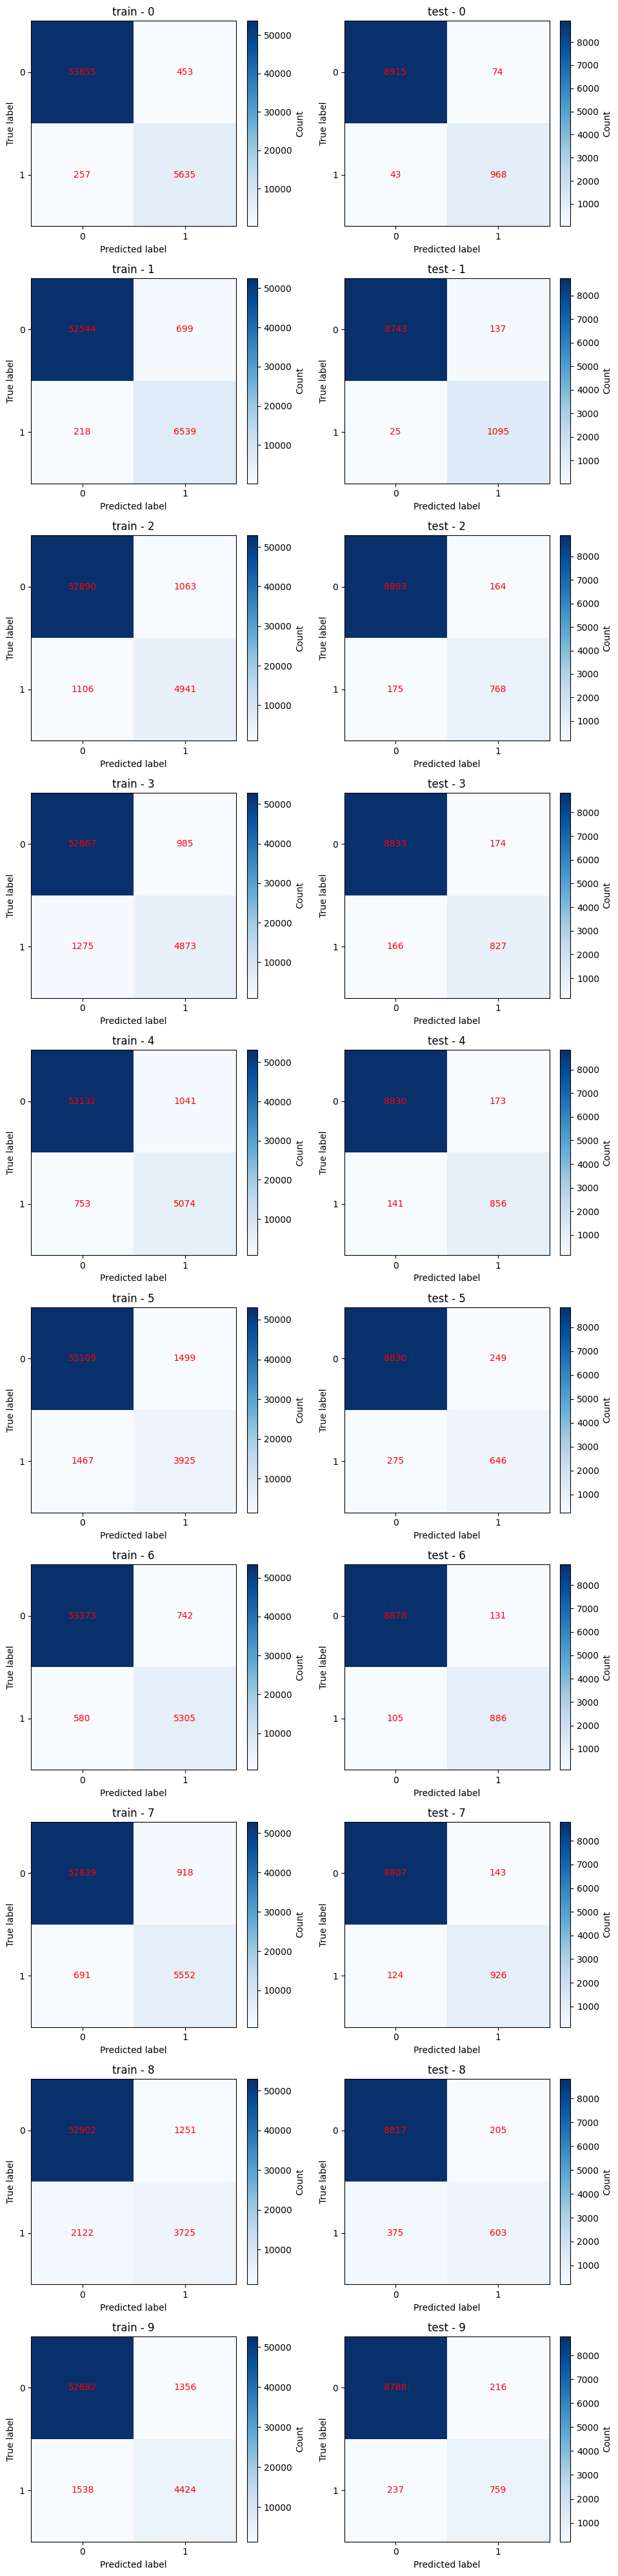

In [87]:
binary_cms_a = []
for i in range(10):
    binary_cms_a.append(compute_confusion_matrix(y_train_one_hot[i], predicted_train_one_hot_a[i], num_classes=2))
    binary_cms_a.append(compute_confusion_matrix(y_test_one_hot[i], predicted_test_one_hot_a[i], num_classes=2))

titles = [title for i in range(10) for title in (f'train - {i}', f'test - {i}')]

plot_confusion_matrix(list(zip(binary_cms_a, titles))[:])

##### In-Sample Error over Time <a id='3-3-1-2'></a>

The in-sample error measures the model's performance on training data. Over time, as the model learns, this error should decrease, indicating better fit to the training data. Tracking this helps assess model effectiveness and convergence.

It is defined this way

$$
E_{in} = \frac
{\#Incorrect \space predictions \space withing \space the \space dataset}
{\#data \space points} 
$$

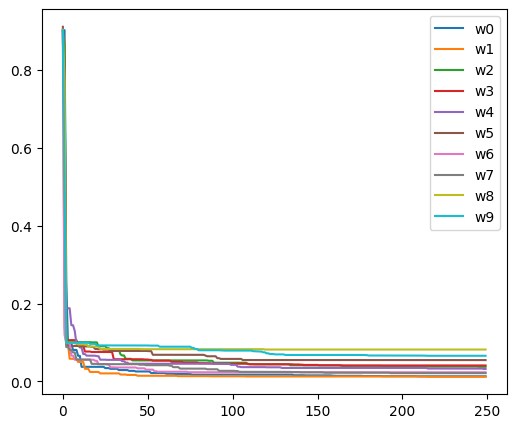

In [88]:
plt.figure(figsize=(6, 5))

# Plot each array as a separate line on the same graph
for i, histogram in enumerate(E_in_min_values):
    plt.plot(histogram, label=f"w{i}")

plt.legend()

plt.show()

##### Calculating True Positive Rate <a id='3-3-1-3'></a>

TPR stands for True Positive Rate. It is a performance metric used in binary classification tasks. TPR represents the proportion of actual positive instances that are correctly identified as positive by the model. It is calculated as the ratio of true positives to the sum of true positives and false negatives. TPR is an important metric as it measures the model's ability to correctly identify positive instances, which is particularly useful in scenarios where detecting positive cases is crucial. Displaying TPR helps assess the model's performance in terms of sensitivity and can provide insights into its effectiveness in identifying positive instances.

More formally, the TPR is defined in this way:
$$ TPR = \frac{TP}{TP + FN} $$
Where TN is defined as the number of *true positive* and FN is defined as the number of *false negative* predictions. \
In the next code snippet we define the function to calculate the TPR.

In [113]:
def calculate_tpr(true_labels, predcited_labels):
    """
    Calculate the True Positive Rate (TPR) of a binary classifier.

    Parameters:
    true_labels (numpy.ndarray): True labels of the samples.
    predicted_labels (numpy.ndarray): Predicted labels of the samples.

    Returns:
    float: The TPR of the given binary classifier on the given dataset.
    """

    # Get the number of examples in the dataset
    num_examples = true_labels.shape[0]

    # Calculate the number of true positives
    num_true_positives = np.sum(np.logical_and(true_labels == 1, predcited_labels == 1))
    num_false_positives = np.sum(np.logical_and(true_labels == 0, predcited_labels == 1))

    # Calculate the TPR
    tpr = num_true_positives / (num_true_positives + num_false_positives)

    return tpr

Let's now display the TPR for each of the binary classifers.

In [114]:
for i in range(10):

    # Calculate the TPR for the current classifier on the training and test sets
    train_tpr = calculate_tpr(y_train_one_hot[i], predicted_train_one_hot_a[i])
    test_tpr = calculate_tpr(y_test_one_hot[i], predicted_test_one_hot_a[i])

    # Print the results
    print(f"[TPR for classifier {i}]: \t train - {train_tpr:.4f} \t test - {test_tpr:.4f}")

[TPR for classifier 0]: 	 train - 0.9256 	 test - 0.9290
[TPR for classifier 1]: 	 train - 0.9034 	 test - 0.8888
[TPR for classifier 2]: 	 train - 0.8230 	 test - 0.8240
[TPR for classifier 3]: 	 train - 0.8319 	 test - 0.8262
[TPR for classifier 4]: 	 train - 0.8298 	 test - 0.8319
[TPR for classifier 5]: 	 train - 0.7236 	 test - 0.7218
[TPR for classifier 6]: 	 train - 0.8773 	 test - 0.8712
[TPR for classifier 7]: 	 train - 0.8581 	 test - 0.8662
[TPR for classifier 8]: 	 train - 0.7486 	 test - 0.7463
[TPR for classifier 9]: 	 train - 0.7654 	 test - 0.7785


The values of the TPR are ranging from 0.7 to 0.85 with spikes of up to 0.92. These values indicate that the model is performing well on the dataset, especially when the values between the train and test sets are very similar, which implies to us that we are not prone to overfitting.

#### Multi-Class Confusion Matrix <a id='3-3-2'></a>

Here we compute the confusion matrix on the dataset based on our learnt hypothesis. \
The multi-class confusion matrix is the same as the confusion matrix, but it represents $k$ classes and its dimention are $k\times k$. It is a matrix that shows the performance of a classification model by summarizing the counts of *True Positive* (TP) and *False Positive* (FP) and displaying them by each class.

Now let's plot the Confusion Matrix for the hypothesis we got from the PLA:

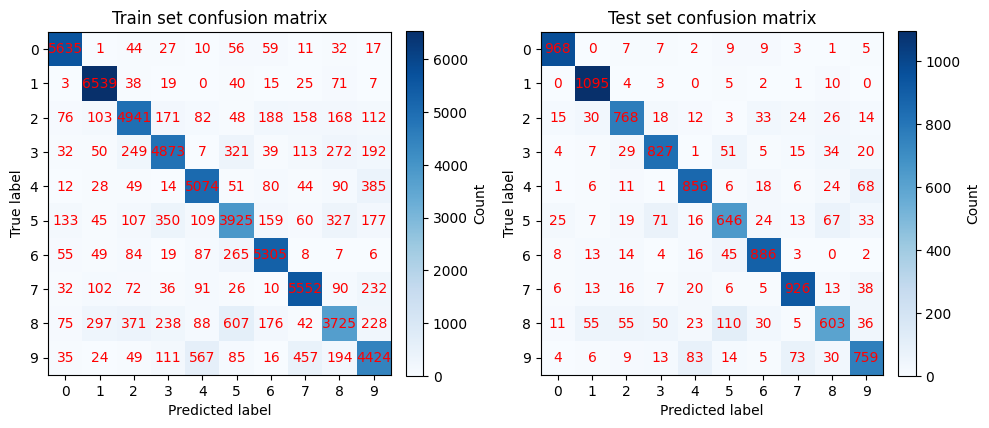

In [91]:
cm_train_a = compute_confusion_matrix(y_train_orig, predicted_labels_train_a, num_classes=10)
cm_test_a = compute_confusion_matrix(y_test_orig, predicted_labels_test_a, num_classes=10)

plot_confusion_matrix([(cm_train_a, "Train set confusion matrix"),
                        (cm_test_a, "Test set confusion matrix")])

#### Evaluating The Model's Accuracy <a id='3-3-3'></a>

The *Accuracy* (ACC) is defined in this way:
$$ACC = \frac{\#correct\space predictions}{\#data\space points}$$
It is a metric that help us understand how well our model is at predictions on various datasets. \
We can from the previous sub-section that the confusion matrix for the train and test set are very similar, this means that our algorithm has not overfitted to the train set and we can infer from that that the ACC of the model on the train and test set will also be similar. \
Let's compute the ACC and print the result: 

In [92]:
def print_acc(true_labels, predicted_labels, set_name):
    """
    Compute and return the accuracy based on true and predicted labels.

    Parameters:
    - true_labels (numpy.ndarray): Array of true labels.
    - predicted_labels (numpy.ndarray): Array of predicted labels.
    - set_name (str): Name of the set.
    
    Returns:
    None
    """

    # Compute the number of true predictions
    true_pred = np.sum((true_labels == predicted_labels).astype(int))

    # Compute number of examples
    num_examples = true_labels.shape[0]

    # The accuaracy is true_pred/num_examples
    acc = true_pred/num_examples

    print(f"ACC for {set_name} is {acc}")

In [93]:
print_acc(y_train_orig, predicted_labels_train_a, set_name="train set")
print_acc(y_test_orig, predicted_labels_test_a, set_name="test set")

ACC for train set is 0.8332166666666667
ACC for test set is 0.8334


Indeed, the variance is very low as expected. This is because the PLA finds a linear function, and because the dataset (MNIST) contains very similar images. The accuarcy we achieved was around $85\%$ with about 250 iterations. I've ran some offline tests, and if we increase the number of iterations to 2000, the pocket fully converges with ACC of $87.5\%$ on the train and the test sets. It is a good result, but not so good compared to how simple the dataset is. If we were using a *neaural network* (NN) with more than one hidden layer and non-linear activation function such as sigmoid or tanh, we would get much better results.

### Conclusions For PLA <a id='3-3'></a>

The PLA is a relatively simple and straight forward algorithm, which is expected as one of the first learning algorithms to be implemented. From this, it is not suprising that the error was very low. The dataset is abnormally large compared to the simplicity of this classification problem, so it is also not suprising that we got little to no overfitting. We also needed to use an upgraded version of the PLA called the pocket algorithm, to help with its convergence. In conclusion, the PLA is a great algorithm for first understanding the basic consepts of machine learning, but it is not something that will be thought about as a solution to a modern day problem due to its low performance.

## PART B: Softmax Regression <a id='4'></a>

The *Softmax Regression* algorithm is another method of learning a hypothesis function that is fitted to some dataset. Unlike the PLA, softmax regression is used for probabilistic outcomes instead of binary ones. It is used for classification problems such as the one we are facing, digit classfication. In this algorithm, we use logistic regression to give a score for each digit, and asserting the prediction as the class with the biggest probability of being the outcome. \
For Learning using this algorithm we will implement two steps:

- Forward propogation
- Backward propogation

Which we will discuss in the following sub-sections.

### Forward Propogation <a id='4-1'></a>

In *Forward Propogation*, we calculate the prediction of the current hypothesis function and save the probabilistic prediction of each class for the *Backward propagation* step.
We will use the following function for prediction:

$$ \mathbf{h}(\mathbf{x}) = \left( \begin{array}{c} P(y=1|\mathbf{x}) \\ \vdots \\ P(y=K|\mathbf{x}) \end{array} \right)= \frac{1}{\sum_{j=1}^{K} e^{\mathbf{w}^{(j)^\top} \mathbf{x} }} \left( \begin{array}{c} e^{\mathbf{w}^{(1)^\top} \mathbf{x}} \\ \vdots \\ e^{\mathbf{w}^{(K)^\top} \mathbf{x}} \end{array} \right) $$

In [94]:
def forward_prop(W, X):
    """
    Performs forward propagation to compute the probability vector for each example.

    Parameters:
    - W (numpy.ndarray): Weight matrix (stacked rows weight vector(s)).
    - X (numpy.ndarray): Input data matrix (stacked coloumns input vector(s)).

    Returns:
    numpy.ndarray: Probability vector(s) for each example (stacked coloumns).
    """

    # Compute score for each class (no need to transpose W).
    Z = np.dot(W, X)
    
    # Compute e^Z (vectorized + np.e will be broadcasted to Z.shape).
    Z = np.float_power(np.e, Z)

    # Compute probability vector(s).
    P = np.divide(Z, np.sum(Z, axis=0, keepdims=True))

    return P

### Backward Propogation <a id='4-2'></a>

Finished forward propogation, we initiate *Backward Propogation*. \
Backward propogation is the part of the model which fits the hypothesis to the dataset. \
In backward propogation, we minimize the *cost function* using the *gradient decent* method.
We will calculate derivatives and update the hypothesis function accordingly.

#### Minimizing The Cost Function <a id='4-2-1'></a>

In order to better fit the hypothesis function to the dataset, we need to minimize the cost function. \
**But what is the cost function?** 

The cost function is a measure of how well our model is predicting labels, and it is given by the formula:
$$ J(W) = \frac{1}{N} \sum_{n=1}^N \mathcal{L}(\hat{y}, y) $$
where
$$ \mathcal{L}(\hat{y}, y) = -\sum_{k=1}^K 1\{y=k\}\ln \hat{y} $$
$N$ is the number of examples in the dataset and we call $\mathcal{L}$ the *Loss Function*. \
**Note** that in our classification problem, $\mathcal{L}$ is the *Cross-Entropy Loss Function* (Log Loss).

To minimize the cost function we will not use an analytic solution. instead we will the *gradient decent* method.

#### Gradient Decent <a id='4-2-2'></a>

As said, in order to minimize the cost function we will use the *gradient decent* method. In gradient decent, instead of minimizing a function by using an analytical solution, we iterate and subtract from the weight **matrix** $W$ the gradient of $J$ with respect to $W$ for all examples in the dataset $X$. The said gradient is given by the formula:
$$ \frac{\partial J}{\partial W} = \frac{1}{N} \sum_{n=1}^N \frac{\partial \mathcal{L}(y_n, y)}{\partial W} = \frac{1}{N} (\hat{Y} - Y) \cdot X^\top $$
where now $Y_n$ and $Y$ are one-hot vectors. \
With all that being said, let's implement backward propogation.

**Notice** that we assign the variable 'dW' the value of $\frac{\partial J}{\partial W}$.

In [95]:
def backward_prop(P, Y, X):
    """
    Computes the gradient of the cost function with respect to the weights using backward propagation.

    Parameters:
    - P (numpy.ndarray): Predicted values (stacked rows).
    - Y (numpy.ndarray): Actual values (stacked rows).
    - X (numpy.ndarray): Input data matrix (stacked columns).

    Returns:
    numpy.ndarray: Gradient of the cost function with respect to the weights.
    """

    # Extract number of examples.
    N = X.shape[1]

    # Compute dW.
    dW = np.multiply((1/N), np.dot(np.subtract(P, Y), X.T))

    return dW

### Computing Cost And Updating Weights <a id='4-3'></a>

After implementing the propogation, we need of course to update the weights as part of the gradient decent and compute the cost for validating the learning.

**Notice** that we will use a hyper-parameter *learning rate*, which is usually noted as $\alpha$ and is responsible for the amount of change gradient decent will make after every iteration. \
As the name implies, higher learning rate means faster learning. But if the learning rate is too high, gradient decent will diverge. The hyper-parameter learning rate is usually tuned to ~$1\cdot 10^{-4}$. To solve our problem, we will later use a much higher value.

In [96]:
def update_weights(W, dW, learning_rate):
    """
    Updates the given weights using gradient descent.

    Parameters:
    - W (numpy.ndarray): Current weights.
    - dW (numpy.ndarray): Gradient of the cost function with respect to the weights.
    - learning_rate (float): Learning rate for gradient descent.

    Returns:
    numpy.ndarray: Updated weights after applying the gradient descent update.
    """

    # Calculating W - alpha*dW
    W = np.subtract(W, np.multiply(learning_rate, dW))

    return W

def compute_cost(P, Y):
    """
    Computes the cross-entropy cost between predicted and actual values.

    Parameters:
    - P (numpy.ndarray): Predicted values.
    - Y (numpy.ndarray): Actual values.

    Returns:
    float: Cross-entropy cost.
    """

    # Extract number of examples
    N = Y.shape[1]

    # Compute cost based on presented formula
    cost = -(1/N) * np.sum(np.multiply(Y, np.log(P)))

    return cost

### Training The Model <a id='4-4'></a>

After implementing all parts of the model, we can implement the soft-max model itself! \
The next code block is pretty large, but it concludes all the previous functions to a training function.

In [97]:
class SoftMaxModel():

    def __init__(self):
        self.num_classes = 0
        self.num_features = 0
        self.W = np.zeros(0)
        self.costs = np.empty(0)

    def train(self, X, Y, learning_rate = 0.01, num_iterations = 200, print_cost = False):

        # Extract number of features of input vectors and examples of dataset
        num_classes = Y.shape[0]; num_features = X.shape[0]

        # Restart model if needed
        if (self.num_classes, self.num_features) != (num_classes, num_features):
            self.W = np.zeros((num_classes, num_features), dtype=float)
            self.num_classes, self.num_features = num_classes, num_features
            self.costs = np.empty(0)

        # Gradient decent
        for i in range(num_iterations):
            P = forward_prop(self.W, X)

            dW = backward_prop(P, Y, X)

            self.W = update_weights(self.W, dW, learning_rate)

            cost = compute_cost(P, Y)
            if print_cost and i % (num_iterations//10) == 0:
                print("Cost after iteration %i: %f" %(i, cost))

            self.costs = np.append(self.costs, cost)

Run this cell in order to reset the model.

In [98]:
smm = SoftMaxModel()

Run this cell as many times as you would like, explore the effects of different learning rates and number of iterations.

**Note** that after testing, learning rate of 1.3 and ~150 iterations have been found optimal to solve this problem.

In [99]:
smm.train(X_train_aug, y_train_one_hot, learning_rate=1.3, num_iterations=150, print_cost=True)

Cost after iteration 0: 2.302585
Cost after iteration 15: 0.645047
Cost after iteration 30: 0.484096
Cost after iteration 45: 0.375470
Cost after iteration 60: 0.359177
Cost after iteration 75: 0.357630
Cost after iteration 90: 0.346366
Cost after iteration 105: 0.328841
Cost after iteration 120: 0.320859
Cost after iteration 135: 0.315556


### Softmax Regression Model Evaluation <a id='4-5'></a>

Let's start evaluating our soft-max regression model.

#### Performance On Cost Function <a id='4-5-1'></a>

One of the way to evaluate the soft max model is to plot its learning curve. The learning curve is a histogram (Cost VS iteration) which helps us better understand the improvement of our model through gradient decent iterations based on a specific learning rate.

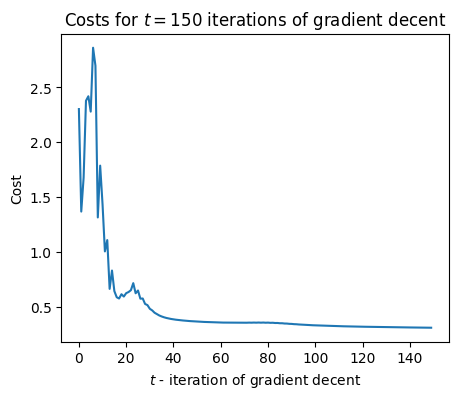

In [100]:
def plot_cost(self):

    # Create a line  plot
    plt.plot(np.arange(len(self.costs)), self.costs)

    # Set labels and title
    plt.xlabel('$t$ - iteration of gradient decent')
    plt.ylabel('Cost')
    plt.title(f'Costs for $t={len(self.costs)}$ iterations of gradient decent')

    # Show the plot
    plt.show()

SoftMaxModel.plot_cost = plot_cost
smm.plot_cost()

#### Evaluating The Model's Accuracy <a id='4-5-2'></a>

We can also evaluate the model's *Accuracy* (ACC), the same way we did in part A. click [here](#3-3-3) for reference.

In [101]:
SoftMaxModel.predict = lambda self, X: predict(self.W.T, X)

predictions_train_b = smm.predict(X_train_aug)
predictions_test_b = smm.predict(X_test_aug)

predicted_train_one_hot_b = identity_matrix[predictions_train_b].T
predicted_test_one_hot_b = identity_matrix[predictions_test_b].T

In [102]:
print_acc(y_train_orig, predictions_train_b, set_name="train set")
print_acc(y_test_orig, predictions_test_b, set_name="test set")

ACC for train set is 0.9128
ACC for test set is 0.9117


Based on the accuracy (~$91\%$ if trained optimaly), nine out of ten pictures should be classifed correctly! That is not a small improvement from the [~$85\%$](#3-3-3) ACC we got from the algorithms presented in part A. Run the cell below to visually see the factor of ACC.  

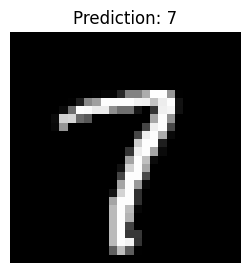

In [103]:
show_rand_prediction(smm.W.T, X_test_aug)

#### Binary Classifiers Performance <a id='4-5-3'></a>

In this section we will evaluate each binary classifer created in the soft-max regression process the same way we did in [part A](#3-3-1).

##### Binary Table of Confusion <a id='4-5-3-1'></a>

Let's present the table of confusion for each digit as we did [here](#3-3-1-1) in part A.

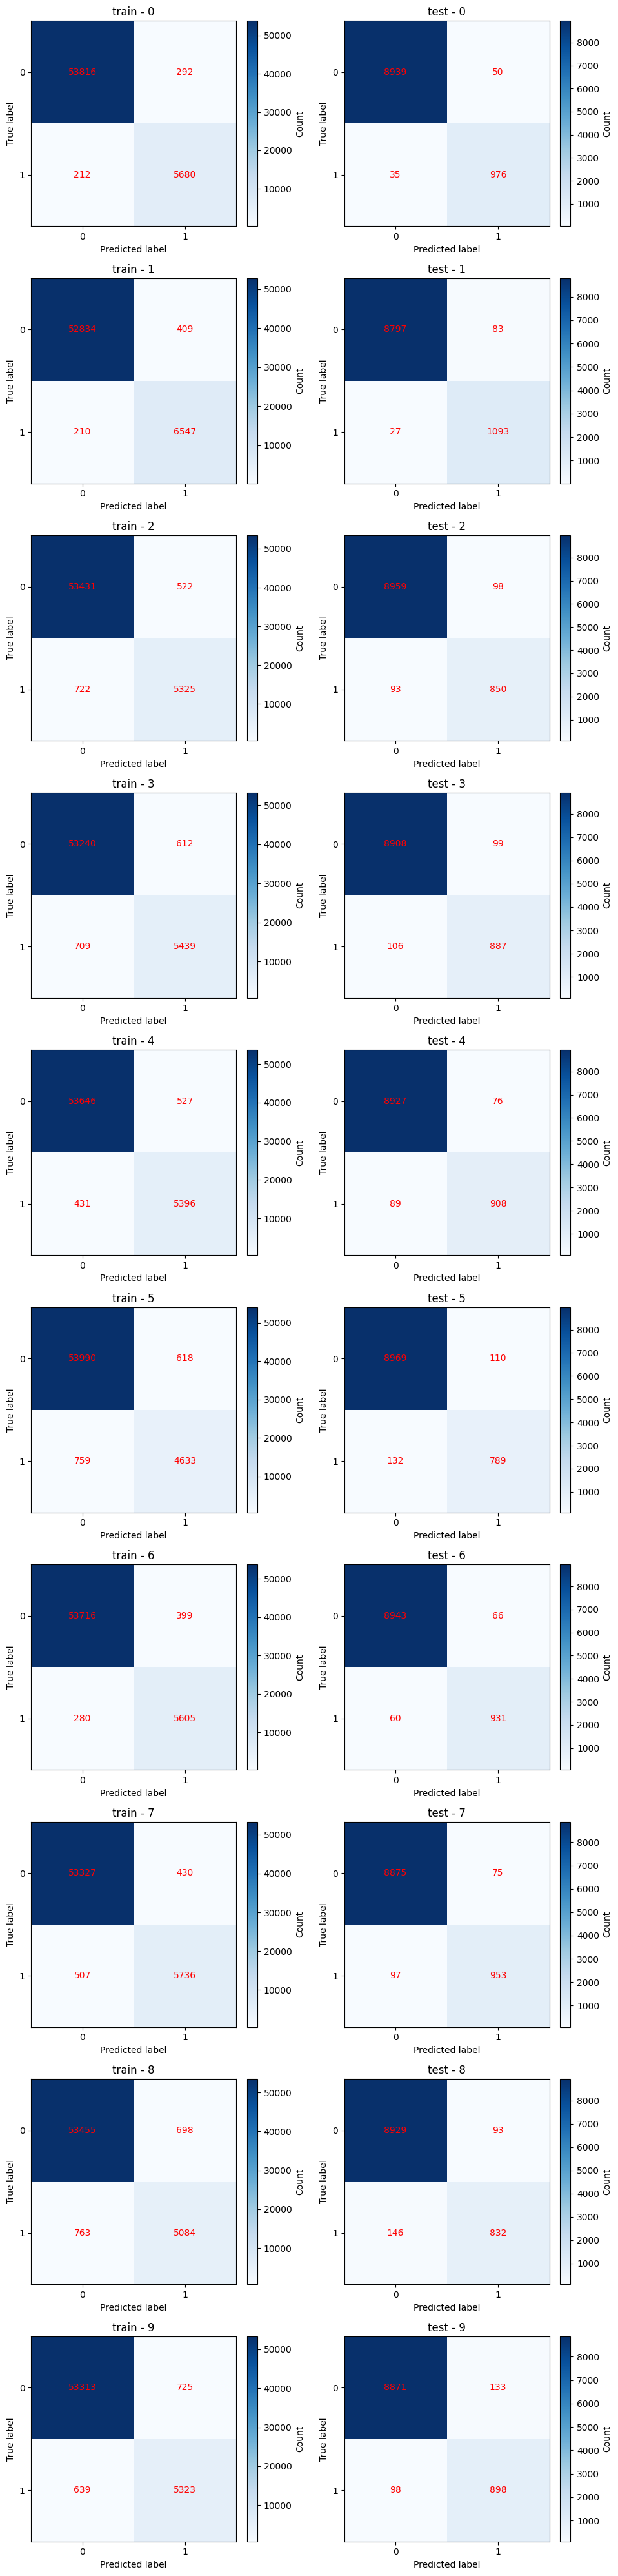

In [104]:
binary_cms_b = []
for i in range(10):
    binary_cms_b.append(compute_confusion_matrix(y_train_one_hot[i], predicted_train_one_hot_b[i], num_classes=2))
    binary_cms_b.append(compute_confusion_matrix(y_test_one_hot[i], predicted_test_one_hot_b[i], num_classes=2))

plot_confusion_matrix(list(zip(binary_cms_b, titles))[:])

We can see pretty good results. The classifers collectively perform well on the dataset as the diagonal holds more values.

##### Calculating True Positive Rate <a id='4-5-3-2'></a>

Let's calculate the TPR (see [here](#3-3-1-3) for reference) for each of the binary classifers.

In [115]:
for i in range(10):

    # Calculate the TPR for the current classifier on the training and test sets
    train_tpr = calculate_tpr(y_train_one_hot[i], predicted_train_one_hot_b[i])
    test_tpr = calculate_tpr(y_test_one_hot[i], predicted_test_one_hot_b[i])

    # Print the results
    print(f"[TPR for classifier {i}]: \t train - {train_tpr:.4f} \t test - {test_tpr:.4f}")

[TPR for classifier 0]: 	 train - 0.9511 	 test - 0.9513
[TPR for classifier 1]: 	 train - 0.9412 	 test - 0.9294
[TPR for classifier 2]: 	 train - 0.9107 	 test - 0.8966
[TPR for classifier 3]: 	 train - 0.8989 	 test - 0.8996
[TPR for classifier 4]: 	 train - 0.9110 	 test - 0.9228
[TPR for classifier 5]: 	 train - 0.8823 	 test - 0.8776
[TPR for classifier 6]: 	 train - 0.9335 	 test - 0.9338
[TPR for classifier 7]: 	 train - 0.9303 	 test - 0.9270
[TPR for classifier 8]: 	 train - 0.8793 	 test - 0.8995
[TPR for classifier 9]: 	 train - 0.8801 	 test - 0.8710


See [here](#3-3-1-3) the discussion about the results. Similar to part A, we got good results, but if we look carfully we can see that the values are a bit bigger, this can indicate that the soft-max is performing better than the PLA.

#### Multi-Class Confusion Matrix <a id='4-5-4'></a>

We can further ahead analyze the model by presenting its Multi-Class Confusion Matrix, as we did in part A. click [here](#3-3-2) for reference.

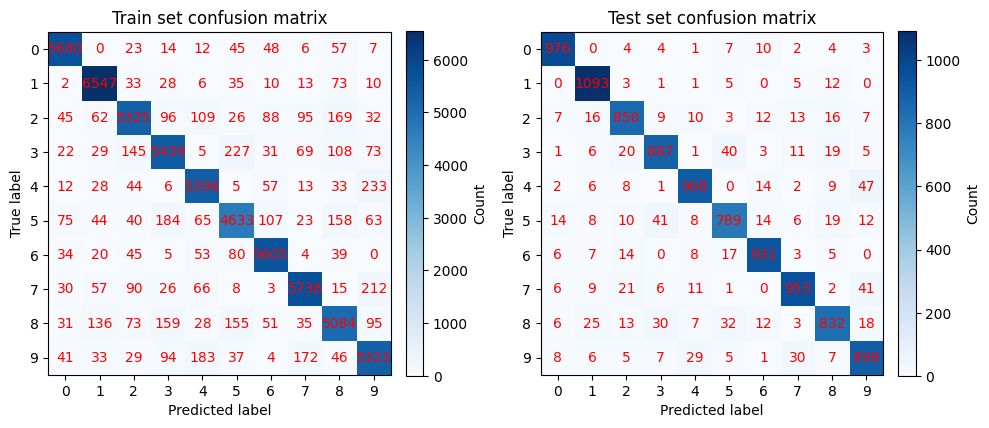

In [106]:
cm_train_b = compute_confusion_matrix(y_train_orig, predictions_train_b, num_classes=10)
cm_test_b = compute_confusion_matrix(y_test_orig, predictions_test_b, num_classes=10)

plot_confusion_matrix([(cm_train_b, "Train set confusion matrix"), 
                       (cm_test_b, "Test set confusion matrix")])

We can see in the confusion matrix that the diagonal is noticeably more blue compared to the rest of the cells. This correlates to the reasonably high ACC we see from the model. Also, as we saw in part A, the matrices from the train set and the test set are very alike. This correlates to the low variance between the ACC of the model on the train and test sets.

### Conclusions For Softmax Regression <a id='4-6-1'></a>

Soft-Max Regression is a very promision technique. The performance of the model on the MNIST dataset shows us that soft-max regression heavily outperforms the PLA, and later we will see that it also outperforms Linear Regression. One of the downsides for soft-max regression is the complexity of the propogation steps. For an amateur data scientist, using this technique could be quite challenging and if the problem is not so complicated and critical, linear regression (which we will discuss in the next section) or the PLA may be more fitting methods for a solution simplicity wise.

## PART C: Linear Regression <a id='5'></a>

Linear Regression is a technique which finds a linear hypothesis function analyticly based on the Least Squares method (which we will present and discuss about in the following sub-section). Similar to the PLA, it finds a linear classifer and alike the soft-max regression, it minimizes some loss function. It differs from both of those algorithms by using analytical properties and not having to iterate, thus making it deterministic and much faster.

### Least Squares <a id='5-1'></a>

The Least Squares method is a method in which we find a fitted hypothesis function analyticly through minimizing the Squared Error:

$$ J = \frac{1}{N}\sum_{n=1}^N (h(\mathbf{x}_n) - y_n)^2 $$

with respect to $ h(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} $.

#### Developing Least Squares Formula <a id='5-1-1'></a>

Differently from the cost function for Soft-Max Regression, the Squared Error formula appears much more appealing to find an optimum using analytical methods. We can devlop the expression by defining:
- The target **vector** $ \mathbf{y} $ to be a coloumn vector containing all the labels.
- The data matrix $ \mathbf{X} $ to contain all the data vectors as horizontally stacked coloumn vectors.

Now with our definitions established, we can develop the formula:
$$
\begin{align*}
J &= \frac{1}{N}\sum_{n=1}^N (h(\mathbf{x}_n) - y_n)^2 \\
  &= \frac{1}{N}\sum_{n=1}^N (\mathbf{w}^\top \mathbf{x}_n - y_n)^2 \\
  &= \frac{1}{N} \| \mathbf{w}^\top \mathrm{X} - \mathbf{y} \| ^2 \\
  &= \frac{1}{N} 
     \langle \mathbf{w}^\top \mathrm{X} - \mathbf{y}, \space \mathbf{w}^\top \mathrm{X} - \mathbf{y}\rangle \\
  &= \frac{1}{N}(\mathbf{w}^\top \mathrm{X}(\mathbf{w}^\top \mathrm{X})^\top -2\mathbf{w}^\top \mathrm{X}\mathbf{y}^\top + \mathbf{y}\mathbf{y}^\top) \\
  &= \frac{1}{N}(\mathbf{w}^\top \mathrm{X}\mathrm{X}^\top\mathbf{w} -2\mathbf{w}^\top \mathrm{X}\mathbf{y}^\top + \mathbf{y}\mathbf{y}^\top) \tag{C.1}
\end{align*}
$$

$
  %\newcommand{\inprod}[2]{\langle #1, \, #2 \rangle}
  %\renewcommand{\inprod}[2]{\langle #1, \, #2 \rangle}
$

#### Finding the Optimum <a id='5-1-2'></a>

We wish to find a weight vector $ \mathbf{w} $ that minimizes the least squares function. Suppose we found such weight vector, since $J$ is a continuous and differentiable function we get from [Fermat's theorem](https://en.wikipedia.org/wiki/Fermat%27s_theorem_(stationary_points)) that it must satisfy
$$ \frac{\partial J}{\partial \mathbf{w}} = 0 $$
So our search reduces for weight vectors that solve the written equation. \
Let's first calculate $ \frac{\partial J}{\partial \mathbf{w}} $
$$
\begin{align*}
    \frac{\partial J}{\partial \mathbf{w}}
&\stackrel{(C.1)}{=} \frac{\partial}{\partial \mathbf{w}}
    \frac{1}{N}(\mathbf{w}^\top \mathrm{X} \mathrm{X}^\top \mathbf{w}
    -2\mathbf{w}^\top \mathrm{X} \mathbf{y}^\top + 
    \mathbf{y}\mathbf{y}^\top) \\
&=  \frac{1}{N} (\frac{\partial}{\partial \mathbf{w}}
    \mathbf{w}^\top \mathrm{X} \mathrm{X}^\top \mathbf{w} 
    -2\frac{\partial}{\partial \mathbf{w}} 
    \mathbf{w}^\top \mathrm{X} \mathbf{y}^\top) \tag{C.2}
\end{align*}
$$
We need now to calculate $\frac{\partial}{\partial \mathbf{w}}\mathbf{w}^\top \mathrm{X}\mathrm{X}^\top\mathbf{w}$ and $ \frac{\partial}{\partial \mathbf{w}}\mathbf{w}^\top \mathrm{X}\mathbf{y}^\top $ separately.

Calculating $\frac{\partial}{\partial \mathbf{w}} \mathbf{w}^\top \mathrm{X} \mathrm{X}^\top \mathbf{w}$: \
We will first prove the identity
$$ 
\frac{\partial}{\partial \mathbf{w}} \mathbf{w}^\top \mathrm{A} \mathbf{w} = 
(\mathrm{A} + \mathrm{A}^\top) \mathbf{w} \tag{C.3}
$$
for any column vector $ \mathbf{w}_{(1,\space n)} $ and square matrix $ \mathrm{A}_{(n, \space n)} $. \
Let $ i \in \{1, ..., n\}$. We can see that

$$
\begin{align*}
    \frac{\partial}{\partial w_i}
    \mathbf{w}^\top \mathrm{A} \mathbf{w} 
&=  \frac{\partial}{\partial w_i}
    \begin{pmatrix}w_1 & \ldots & w_n \end{pmatrix}
    \begin{pmatrix}
        a_{11} & \dots & a_{1n} \\
        \vdots & \ddots & \vdots \\
        a_{n1} & \dots & a_{nn}
    \end{pmatrix}
    \begin{pmatrix}w_1 \\ \vdots \\ w_n \end{pmatrix} \\
&=  \frac{\partial}{\partial w_i}
    \begin{pmatrix}w_1 & \ldots & w_n \end{pmatrix}
    \begin{pmatrix}
        w_1 a_{11} + \dots + w_n a_{1n} \\
        \vdots \\
        w_1 a_{n1} + \dots + w_n a_{nn}
    \end{pmatrix} \\
&=  \frac{\partial}{\partial w_i}
    \sum_{i=1}^n w_i (w_1 a_{i1} + \ldots + w_n a_{in}) \\
&=  \frac{\partial}{\partial w_i}
    \left[
        w_i (w_1 a_{i1} + \ldots + w_n a_{in}) + \sum_{k \neq i} w_k (w_1 a_{k1} + \ldots + w_n a_{kn})
    \right] \\
&=  2w_i a_{ii} + \sum_{k \neq i} w_k a_{ik} + \sum_{k \neq i} w_k a_{ki} \\
&=  (\mathrm{A}_{i \text{row}} + \mathrm{A}_{i \text{row}}^\top)\mathbf{w}
\end{align*}
$$

From this we can conclude the identity $(C.3)$. \
The matrix $ \mathrm{X} $ as a data matrix with stacked column feature vectors has the dimensions of $(d+1, N)$ (refer to [here](#2-4) for an explanation about the expansion of the features from $d$ to $d+1$), So by the properties of matrix multiplication, the matrix $ \mathrm{X} \mathrm{X}^\top $ is a square matrix by the order of $d+1$. We can now use $(C.3)$ to deduce

$$
\frac{\partial}{\partial \mathbf{w}} \mathbf{w}^\top \mathrm{X} \mathrm{X}^\top \mathbf{w} =
(\mathrm{X} \mathrm{X}^\top + (\mathrm{X} \mathrm{X}^\top)^\top) \mathbf{w} =
2 \mathrm{X} \mathrm{X}^\top \mathbf{w} \tag{C.4}
$$

Calculating $ \frac{\partial}{\partial \mathbf{w}} \mathbf{w}^\top \mathrm{X} \mathbf{y}^\top $: \
We will first prove the identity
$$ 
\frac{\partial}{\partial \mathbf{w}} \mathbf{w}^\top \mathbf{a} = \mathbf{a} \tag{C.5}
$$

for any two column vectors $\mathbf{w}, \mathbf{a}$ with order $n$. \
Let $ i \in \{1, ..., n\}$. We can see that

$$
\frac{\partial}{\partial w_i} \mathbf{w}^\top \mathbf{a} =
\frac{\partial}{\partial w_i} \sum_{j=1}^n w_j a_j = a_i
$$

from this we can clearly conclude $(C.5)$.
Now, we get from our definition of the data matrix and the target vector from the last sub-section and from matrix multiplication properties that $ \mathrm{X} \mathbf{y}^\top $ is a column vector with the order of $d+1$. \
From this and from the proven identity $(C.5)$, we can see that

$$
\frac{\partial}{\partial \mathbf{w}} \mathbf{w}^\top \mathrm{X} \mathbf{y}^\top = \mathrm{X} \mathbf{y}^\top \tag{C.6}
$$

Using $(C.4)$ and $(C.6)$ we can continue calculating $ \frac{\partial J}{\partial \mathbf{w}} $ from $(C.2)$

$$
\frac{\partial J}{\partial \mathbf{w}} =
\frac{1}{N} (\frac{\partial}{\partial \mathbf{w}}
    \mathbf{w}^\top \mathrm{X} \mathrm{X}^\top \mathbf{w} 
    -2\frac{\partial}{\partial \mathbf{w}} 
    \mathbf{w}^\top \mathrm{X} \mathbf{y}^\top) =
\frac{1}{N} (2 \mathrm{X} \mathrm{X}^\top \mathbf{w} -2\mathrm{X} \mathbf{y}^\top) \tag{C.7}
$$

Remember now we are trying to solve $ \frac{\partial J}{\partial \mathbf{w}} = 0 $ for $\mathbf{w}$. \
Using $(C.7)$ we can solve it:

$$
\frac{\partial J}{\partial \mathbf{w}} = 0 \iff
\frac{1}{N} (2 \mathrm{X} \mathrm{X}^\top \mathbf{w} -2\mathrm{X} \mathbf{y}^\top) = 0 \iff
\mathrm{X} \mathrm{X}^\top \mathbf{w} = \mathrm{X} \mathbf{y}^\top
$$

Now since in most cases $N >> d+1$, we can assume that $\mathrm{X} \mathrm{X}^\top$ is non singular (if not, a [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of $\mathrm{X} \mathrm{X}^\top$ can still be calculated). We get from this

$$
\frac{\partial J}{\partial \mathbf{w}} = 0 \iff
\mathbf{w} = (\mathrm{X} \mathrm{X}^\top)^{-1} \mathrm{X} \mathbf{y}^\top \tag{C.8}
$$

We have found that there is a single solution to the problem under the assumption that $\mathrm{X} \mathrm{X}^\top$ is non singular. we can deduce from that that the solution $\mathbf{w}$ to the equation is a minimum to the square error function $J$ (a proof for this will not be given here). From the least squares method we get that $\mathbf{w}$ are the optimal weights for the hypothesis function $h(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$, and we have finished presenting the linear regression learning technique.

### Implementing Linear Regression <a id='5-2'></a>

After all the theoretical work is done, we can start implementing the model in python.

#### Fitting with Linear Regression <a id='5-2-1'></a>

We can use the solution to the least squares problem that we found in the previous sub-section to implement a simple function to calculate the optimal weight vector.

In [107]:
def linear_reg_fit(data_matrix, target_vector):
    """
    Fits a linear regression model.

    Parameters:
    - data_matrix (numpy.ndarray): Input data matrix with features (#features, #examples).
    - target_vector (numpy.ndarray): Target vector for regression (1, #examples).

    Returns:
    - numpy.ndarray: Coefficients of the linear regression model.
    """

    return np.dot(np.dot(np.linalg.pinv(np.dot(data_matrix, data_matrix.T)), data_matrix), target_vector.T)

#### Predicting with Linear Regression Model <a id='5-2-2'></a>

We have found a solution to the least squares problem, but how can we predict using the evaluated hypothesis function? We can use linear regression to get 10 hypothesis functions, each one classifies a different digit. Using these hypothesis functions we can evaluate predictions with the method addressed [here](#3-2-2). We now have the necessary tools to implement the linear regression model.

In [108]:
class LinRegModel:
    def __init__(self, num_features, num_classes):
        self.num_features = num_features
        self.num_classes = num_classes
        self.binary_classifers = np.empty((num_features, num_classes))

    def fit(self, X_set_aug, y_set_one_hot):
        for clas in range(self.num_classes):
            self.binary_classifers[:, clas] = linear_reg_fit(X_set_aug, y_set_one_hot[clas])

    def predict(self, X_set_aug):

        # Using predict implementation of part A.
        return predict(self.binary_classifers, X_set_aug)

#### Training the Linear Regression Model <a id='5-2-3'></a>

Finished implementing all aspects of the model, we can finally train it on the MNIST dataset. Remember that linear regression finds a solution to the least squares problem analyticly, so the training should be much faster compared to that of the PLA or soft-max regression.

In [109]:
# Creating an instance of the model
lin_reg_model = LinRegModel(num_features=X_train_aug.shape[0], num_classes=y_train_one_hot.shape[0])

# Fitting the model to the MNIST train set we defined in the MNIST Dataset section
lin_reg_model.fit(X_train_aug, y_train_one_hot)

### Linear Regression Model Evaluation <a id='5-3'></a>

After finishing implementing the model and training it, we should see its performance on different performance metrics. We will start with the [multi-class confusion matrix](#3-3-2) and move on to [ACC](#3-3-3) evaluation. For evaluations, we will use the functions created in part A.

#### Multi-Class Confusion Matrix <a id='5-3-1'></a>

We will now present the multi-class confusion matrix, described [here](#3-3-2) in part A.

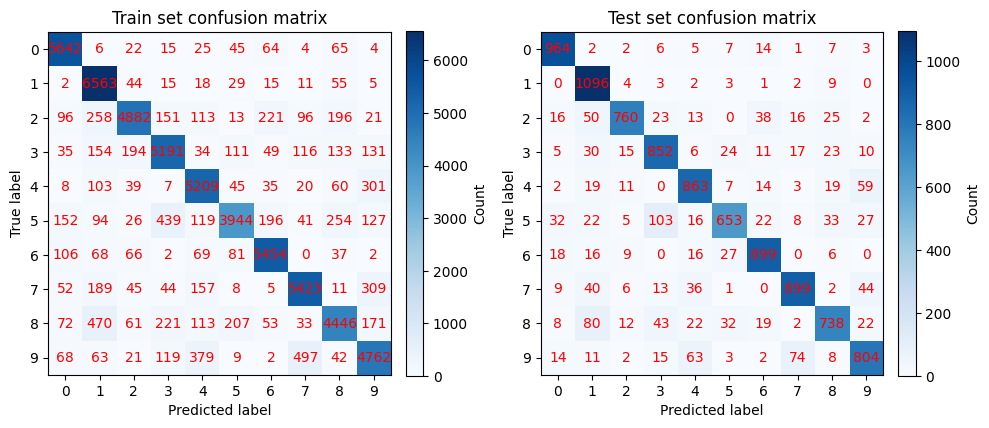

In [110]:
predicted_labels_train_c = lin_reg_model.predict(X_train_aug)
predicted_labels_test_c = lin_reg_model.predict(X_test_aug)

cm_train_c = compute_confusion_matrix(y_train_orig, predicted_labels_train_c, num_classes=10)
cm_test_c = compute_confusion_matrix(y_test_orig, predicted_labels_test_c, num_classes=10)

plot_confusion_matrix([(cm_train_c, "Train set confusion matrix"), (cm_test_c, "Test set confusion matrix")])

We can see similar to previous results that both of the confusion matrix are alike and pretty near to the identity matrix. So we can infer that the ACC will be $>80\%$ and close on the train and test sets.

#### Evaluating The Model's Accuracy <a id='5-3-2'></a>

Let's evaluate and present the linear regression model's accuracy (ACC) on the train and test sets as we have done in [this](#3-3-3) section of part A. 

In [112]:
print_acc(y_train_orig, predicted_labels_train_c, set_name="train set")
print_acc(y_test_orig, predicted_labels_test_c, set_name="test set")

ACC for train set is 0.8586
ACC for test set is 0.8528


### Conclusions for Linear Regression <a id='5-4'></a>

We have diagnosed the square error function and sought out a solution for the least squares problem (i.e., minimizing the square error function). We used the solution to train the linear regression model to classify an image of a digit from the MNIST dataset. We have found that linear regression performs pretty well ($85\%$ ACC), same as the PLA ($85\%$ ACC) which is a very good result for an analytical technique. It does not out performs soft-max regression which got $91\%$ ACC, and that is not suprising given that gradient decent is one of the most popular learning techniques today. Also, in our case the linear regression model did not overfit at all. We can see that from the low variance between the ACC on the train and test sets, and also from the similarity of the confusion matrices. Overall, linear regression is a viable technique both on its simplicity and performance. It performs the same as the PLA but uses much less resources, it is also easy to implement so I recommend to use it instead of the PLA.

# ML-ALgorithms-Research
In this research I implemented the classic PLA, regression algorithms such as Linear Regression and Logistic Regression, and dive deep into their performance on the famous MNIST dataset.

## Introduction
This repository contains the code and documentation for my research on machine learning algorithms. The main focus is on the Perceptron Learning Algorithm (PLA), Linear Regression, and Logistic Regression. The performance of these algorithms is evaluated on the MNIST dataset.

## Contents
- [Getting Started](#Getting-Started)
- [PLA](#pla)
- [Linear Regression](#linear-regression)
- [Logistic Regression](#logistic-regression)
- [MNIST Dataset](#mnist-dataset)

## Getting Started
To begin your journey with this research project, follow these straightforward steps:

1. Clone the Repository:
First, clone this repository to your local machine using the following command: 
`git clone https://github.com/ofir-paz/ML-ALgorithms-Research.git`

2. Install Dependencies: 
Ensure you have the necessary dependencies installed. Run the following commands to install them:
`pip install numpy matplotlib scikit-learn tqdm`

These libraries are essential for running the code and analyzing the results.
Explore the Algorithms:
Dive into the provided notebook! It contains various algorithms related to our research.
Experiment, learn, and adapt as you explore the exciting world of data science and machine learning.

## PLA
The Perceptron Learning Algorithm (PLA) is a binary classification algorithm. It aims to find a hyperplane that separates the data points of different classes.

## Linear Regression
Linear Regression is a regression algorithm that models the relationship between a dependent variable and one or more independent variables. It aims to find the best-fitting line that minimizes the sum of squared errors.

## Logistic Regression
Logistic Regression is a classification algorithm that models the probability of a binary outcome. It uses a logistic function to map the input variables to the output probabilities.

## MNIST Dataset
The MNIST dataset is a collection of handwritten digits. It is widely used as a benchmark dataset for evaluating machine learning algorithms.

## Conclusion
In this research, we explored the performance of the PLA, Linear Regression, and Logistic Regression algorithms on the MNIST dataset. The results showed that...
